In [57]:
import numpy as np
from scipy.stats import kde
from tqdm import tqdm
import sys
import matplotlib.pyplot as plt
from  sklearn.neighbors import KernelDensity
from astropy.table import Table
sys.path.insert(0, '/home/reza/erq/')
from erqml import *
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
tab=Table.read('/home/reza/erq/sampling/LM_sample.fits')
# This 2D array will hold all the spectra used for the median below
# selection parameters
z_dr12=tab['z_dr12']
plate = tab['Plate']
mjd = tab['MJD']
fiberid= tab['FiberID']

#  parametres 
W3 = tab['ABw3']
imw3 =tab['i-w3']
REW = tab['rew_gf']
REW= np.log10(REW)
FWHM = tab['fwhm_gf']
kt80 = tab['kurt80_gf']
frat_civ_nv = tab['frat_nv/civ']
rw3=tab['r-w3']
rz=tab['r-z']
iz= imw3 - rw3 + rz
Lum = tab['Lum']
data =np.array(list(zip(imw3,  REW, kt80)))
data, m,r = MinMaxScaler(data)
x, y, z = data.T
# xi, yi, zi =kde2D(x,y, bw)
k = kde.gaussian_kde(data.T)

# xi, yi, zi = np.mgrid[x.min():x.max():ngrid*1j, y.min():y.max():ngrid*1j, 
#                       z.min():z.max():ngrid*1j]
# di = k(np.vstack([xi.flatten(), yi.flatten(), zi.flatten()]))
# di /=max(di)
C=np.median(data, axis=0)
density = k(data.T)


0


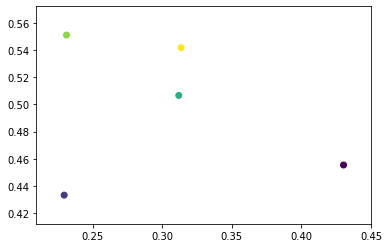

10


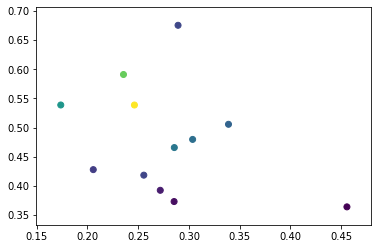

20


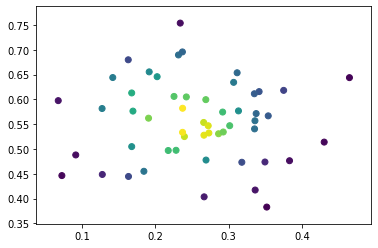

30


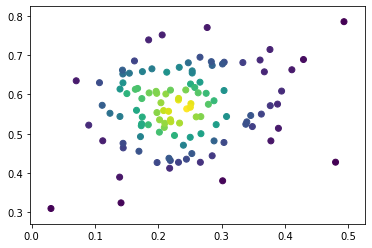

40


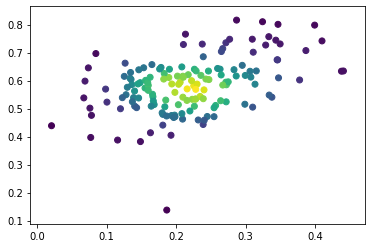

50


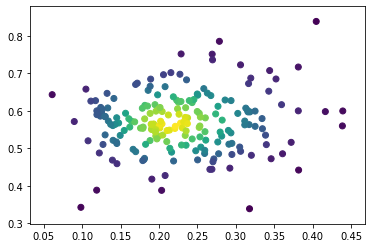

60


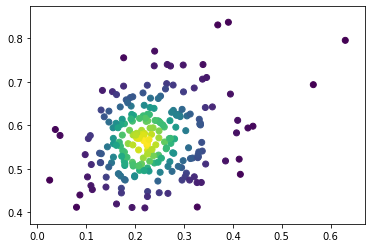

70


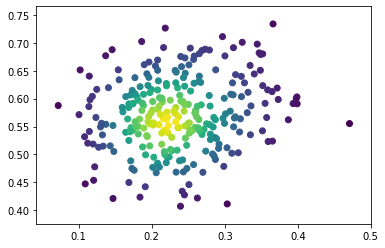

80


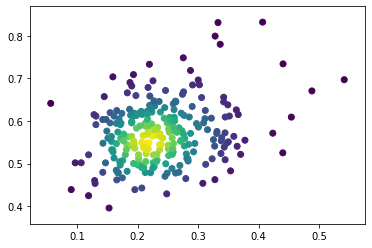

90


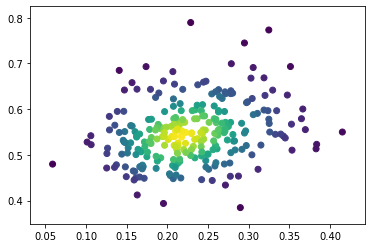

100


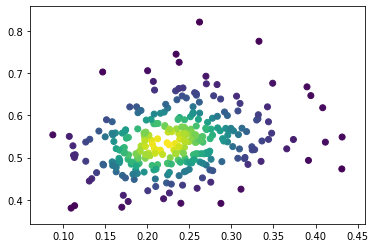

110


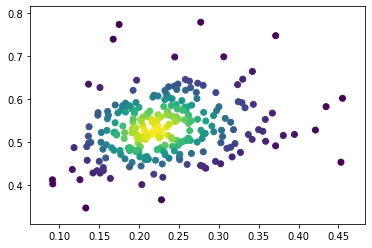

120


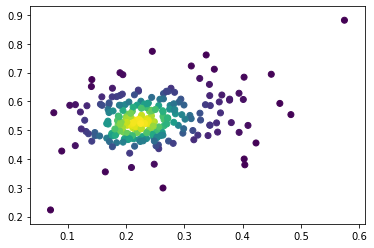

130


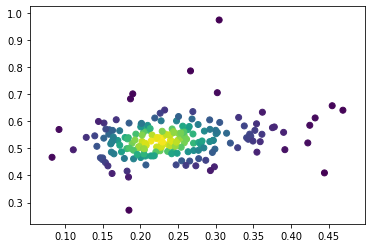

140


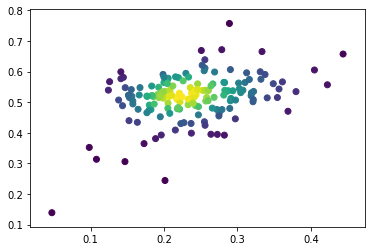

150


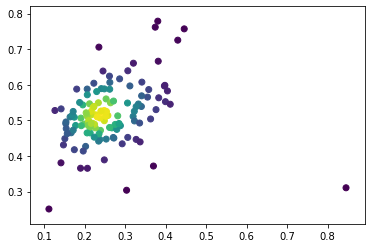

160


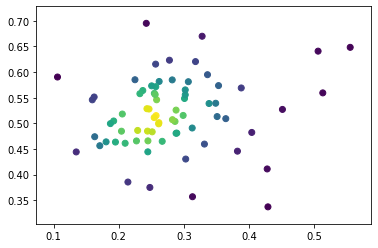

170


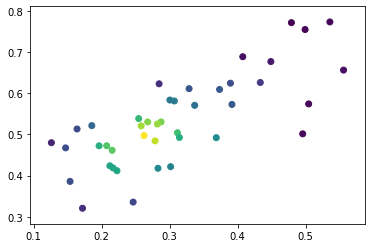

180


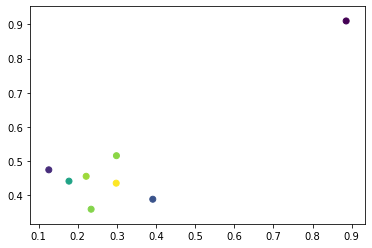

190


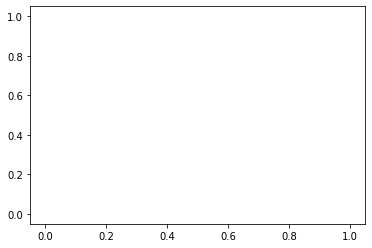

In [47]:
# ax=Axes3D(plt.figure())
ngrid=10
zz=np.linspace(z.min(), z.max(), ngrid)
for n in range(0,ngrid):
    print(n)
    if(n<ngrid-1): 
        data_p = data[(z<zz[n+1]) & (z>zz[n])]
        density_p = density[(z<zz[n+1]) & (z>zz[n])]
    if(n==ngrid-1): 
        data_p = data[ (z>zz[n])]
        density_p = density[(z>zz[n])]
    plt.scatter(data_p[:,0], data_p[:,1], c=density_p)
    plt.show() 

In [79]:
k=kde.gaussian_kde(data.T)
bw=3; ngrid=100
k.set_bandwidth(bw_method=k.factor*bw)

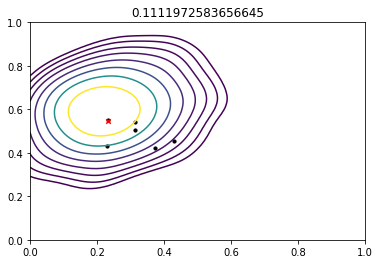

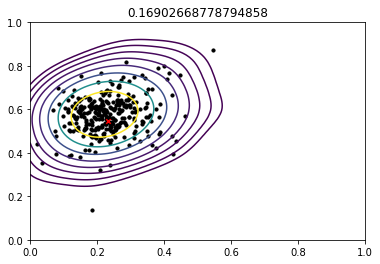

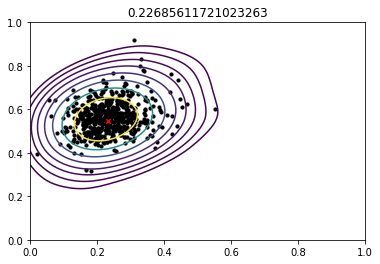

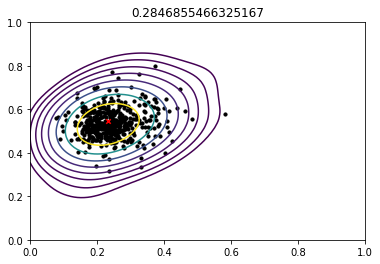

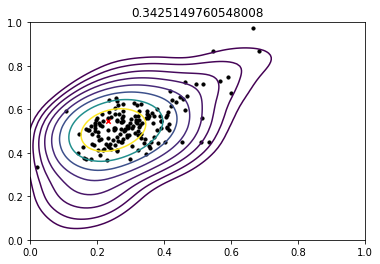

In [80]:
ngrod=200
x3d, y3d, z3d = np.mgrid[x.min():x.max():ngrid*1j, y.min():y.max():ngrid*1j,
                         z.min():z.max():ngrid*1j]
zz=np.linspace(z.min(), z.max(), ngrid)
dz = zz[1]-zz[0]
kt=np.linspace(kt80.min(), kt80.max(), ngrid)
x2d, y2d = np.mgrid[x.min():x.max():ngrid*1j, y.min():y.max():ngrid*1j]
for n in range(0,ngrid, 20):
    p=np.vstack([x3d[:,:,n].flatten(), y3d[:,:,n].flatten(), z3d[:,:,n].flatten()])
    rho = k(p)
    rho=rho/np.max(rho)
    if(n<ngrid-1): data_p = data[(z<zz[n+1]) & (z>zz[n])]
    if(n==ngrid-1): data_p = data[ (z>zz[n])]
#     plt.pcolormesh(x2d, y2d,rho.reshape(x2d.shape) )
#     if np.mod(n,10)==0:
    plt.contour(x2d, y2d,  rho.reshape(x2d.shape), levels=[ 0.01625*0.25, 0.01625*.5, 0.01625,  0.03125,  0.0625, 0.125,0.25,0.5])
    plt.title(kt[n])
#     print(stats.spearmanr(data_p[:,0], data_p[:,1]))
    plt.scatter(data_p[:,0], data_p[:,1], c='black', s=10)
    plt.scatter(C[0], C[1], c='red', s=20, marker='x')
    plt.show()
    
# density_bins=np.linspace(density.min(), density.max(), 8)
#     for i in range(8):
        

0.010101010101010102